In [1]:
#loading the libraries

import numpy as np
import pylab as plt
import networkx as nx


In [2]:
bees = [2]
smoke = [4,5,6]

In [3]:
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

In [4]:
start=0
goal=7

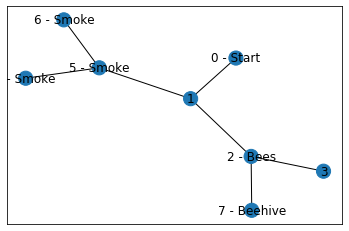

In [7]:
# constructing the graph

G=nx.Graph()
G.add_edges_from(points_list)
mapping={0:'0 - Start', 1:'1', 2:'2 - Bees', 3:'3',
    4:'4 - Smoke', 5:'5 - Smoke', 6:'6 - Smoke', 7:'7 - Beehive'}
H=nx.relabel_nodes(G,mapping)
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H,pos,
    node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(H,pos)
nx.draw_networkx_labels(H,pos)
plt.show()

In [14]:
# constructing the reward matrix

# construct a matrix

MATRIX_SIZE = 8
# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [18]:
# updating the rewards

# update the rewards
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100
R


(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [19]:
# re-initialize the Q-networks
MATRIX_SIZE = 8
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
enviro_bees = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
enviro_smoke = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
Q


matrix([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [20]:
# defining the functions
initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

av_actions=available_actions(initial_state)
av_actions




array([0, 2, 5], dtype=int64)

In [22]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

In [25]:
# collect environmental data

def collect_environmental_data(action):
    found = []
    if action in bees:
        found.append('b')

    if action in smoke:
        found.append('s')
    return (found)

In [27]:
# invoking the functions

available_act = available_actions(initial_state)
action = sample_next_action(available_act)
action

0

In [28]:
# updating the state
def update(current_state, action, gamma):
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]

  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)

  environment = collect_environmental_data(action)
  if 'b' in environment:
    enviro_bees[current_state, action] += 1

  if 's' in environment:
    enviro_smoke[current_state, action] += 1

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state,action,gamma)

NameError: name 'gamma' is not defined

In [29]:
# invoking the defined methods
# collecting the environmental data

gamma=0.8
update(initial_state,action,gamma)

scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)

# print environmental matrices
print('Bees Found')
print(enviro_bees)
print('Smoke Found')
print(enviro_smoke)


max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 100.0
max_value 0.0
max_value 0.0
max_value 180.0
max_value 0.0
max_value 144.0
max_value 180.0
max_value 0.0
max_value 244.0
max_value 244.0
max_value 195.20000000000002
max_value 0.0
max_value 195.20000000000002
max_value 0.0
max_value 195.20000000000002
max_value 0.0
max_value 195.20000000000002
max_value 156.16000000000003
max_value 0.0
max_value 0.0
max_value 124.92800000000003
max_value 295.20000000000005
max_value 195.20000000000002
max_value 195.20000000000002
max_value 0.0
max_value 0.0
max_value 0.0
max_value 336.1600000000001
max_value 268.92800000000005
max_value 0.0
max_value 0.0
max_value 156.16000000000003
max_value 268.92800000000005
max_value 0.0
max_value 268.92800000000005
max_value 0.0
max_value 156.16000000000003
max_value 0.0
max_valu

max_value 255.96597176330798
max_value 319.97822192851714
max_value 319.97822192851714
max_value 255.98257754281371
max_value 204.7727774106464
max_value 255.98257754281371
max_value 399.9727774106464
max_value 319.97822192851714
max_value 399.9727774106464
max_value 319.97822192851714
max_value 204.7727774106464
max_value 319.97822192851714
max_value 255.98257754281371
max_value 319.97822192851714
max_value 255.98257754281371
max_value 255.98257754281371
max_value 204.786062034251
max_value 399.9727774106464
max_value 319.97822192851714
max_value 255.98257754281371
max_value 255.98257754281371
max_value 319.97822192851714
max_value 319.97822192851714
max_value 255.98257754281371
max_value 319.97822192851714
max_value 499.965971763308
max_value 399.9727774106464
max_value 204.786062034251
max_value 399.9727774106464
max_value 255.98257754281371
max_value 255.98257754281371
max_value 204.786062034251
max_value 399.9727774106464
max_value 399.9727774106464
max_value 319.97822192851714
ma

In [31]:
# use the environment data for learning

Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
enviro_matrix = enviro_bees - enviro_smoke
enviro_matrix

matrix([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,  26.,   0.,   0., -26.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,  79.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0., -98.,   0.,   0.],
        [  0.,   0.,   0.,   0., -32.,   0., -34.,   0.],
        [  0.,   0.,   0.,   0.,   0., -88.,   0.,   0.],
        [  0.,   0.,  37.,   0.,   0.,   0.,   0.,   0.]])

In [32]:
# Get available actions in the current state
available_act = available_actions(initial_state)

# Sample next action to be performed
action = sample_next_action(available_act)

In [33]:
# update function with environmental factors

# This function updates the Q matrix according to
# the path selected and the Q learning algorithm
def update(current_state, action, gamma):

    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'b' in environment:
        enviro_matrix[current_state, action] += 1
    if 's' in environment:
        enviro_matrix[current_state, action] -= 1

    return(np.sum(Q/np.max(Q)*100))

update(initial_state,action,gamma)



max_value 0.0


c:\users\masudrahman\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


nan

In [34]:
enviro_matrix_snap = enviro_matrix.copy()

In [35]:
def available_actions_with_enviro_help(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    # if there are multiple routes, dis-favor anything negative
    env_pos_row = enviro_matrix_snap[state,av_act]
    if (np.sum(env_pos_row < 0)):
        # can we remove the negative directions from av_act?
        temp_av_act = av_act[np.array(env_pos_row)[0]>=0]
        if len(temp_av_act) > 0:
            print('going from:',av_act)
            print('to:',temp_av_act)
            av_act = temp_av_act
    return av_act

In [36]:
# training with EV factors

# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions_with_enviro_help(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

going from: [1 4 6]
to: [1]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [1 4 6]
to: [1]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [1 4 6]
to: [1]
max_value 0.0
Score: nan
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [1 4 6]
to: [1]
max_value 0.0
Score: nan
max_value 100.0
Score: 100.0
max_value 180.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 244.0
Score: 173.77049180327867
max_value 0.0
Score: 173.77049180327867
max_value 0.0


c:\users\masudrahman\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


849.4244664016812
going from: [1 4 6]
to: [1]
max_value 319.07879852545375
Score: 849.4244664016812
max_value 255.26303882036302
Score: 849.4244664016812
going from: [0 2 5]
to: [0 2]
max_value 255.07879852545375
Score: 849.4244664016812
max_value 255.26303882036302
Score: 849.4244664016812
max_value 255.26303882036302
Score: 849.4244664016812
max_value 398.8484981568172
Score: 849.4244664016812
max_value 498.8484981568172
Score: 848.9919885764616
max_value 255.26303882036302
Score: 848.9919885764616
max_value 398.8484981568172
Score: 848.9919885764616
max_value 398.8484981568172
Score: 848.9919885764616
max_value 255.26303882036302
Score: 848.9919885764616
max_value 255.26303882036302
Score: 848.9919885764616
max_value 398.8484981568172
Score: 848.9919885764616
max_value 319.07879852545375
Score: 849.0381549715671
max_value 255.26303882036302
Score: 849.0381549715671
max_value 398.8484981568172
Score: 849.0381549715671
going from: [0 2 5]
to: [0 2]
max_value 255.26303882036302
Score: 

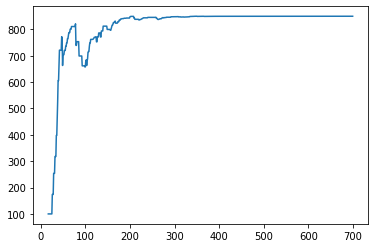

In [37]:
# showing the plot
plt.plot(scores)
plt.show()

In [39]:
# testing with the training algorithm

# perform the testing now

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)


Most efficient path:
[0, 1, 2, 7]
